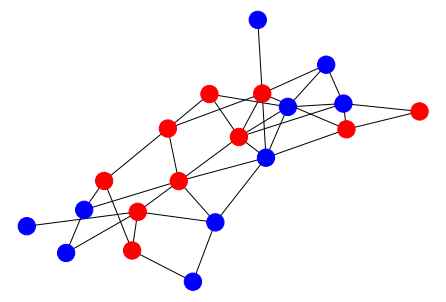

In [202]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

colorDict = {-1: "red", 1: "blue"}
beta_j = 0.08

G = nx.fast_gnp_random_graph(20, 0.2)
spins = np.random.choice([-1,1], len(G.nodes))
pos = nx.spring_layout(G)
colorMap = [colorDict[element] for element in spins]
nx.draw(G, pos = pos, font_color="white",  font_weight = "bold", node_color=colorMap)

In [ ]:
def animate(i):
    time_text.set_text(time_template % (i*dt))
    return time_text, 

In [209]:

def anim(i):
    toFlip = np.random.choice( np.arange(len(G.nodes)) )
    print("toFlip: ",toFlip)
    neighbours = list(G.adj[ toFlip ])

    DEnergy = 2 * spins[toFlip] * ( spins[neighbours].sum() )
    print("DEnergy: ",DEnergy)

    if DEnergy < 0:
        spins[toFlip] *= -1
    elif DEnergy == 0:
        spins[toFlip] *= np.random.choice([-1,1])
    elif DEnergy > 0:
        spins[toFlip] *= np.random.choice([-1,1], p = [ np.exp(-beta_j  * DEnergy), 1 - np.exp(-beta_j  * DEnergy) ])

    colorMap = [colorDict[element] for element in spins]
    nx.draw(G, pos = pos, font_color="white",  font_weight = "bold", node_color=colorMap)

In [194]:
colorMap = [colorDict[element] for element in spins]

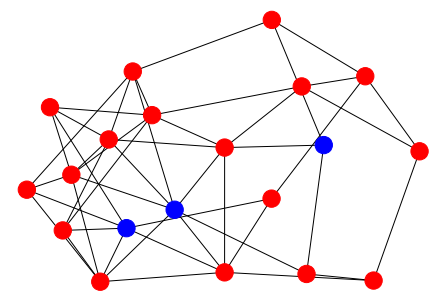

In [195]:
nx.draw(G, pos = pos, font_color="white",  font_weight = "bold", node_color=colorMap)

In [210]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ani = animation.FuncAnimation(fig, anim, frames = 6,
                              interval=15, blit=True)

toFlip:  8
DEnergy:  -4


RuntimeError: The animation function must return a sequence of Artist objects.